### 회귀df에서 지역화폐를 잘 쓴 지역만 고려햐여 상관계수 다시 분석

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# matplotlib 한글 
import platform
if platform.system() == 'Darwin' : 
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

In [2]:
df = pd.read_csv('../data/경기도/전처리 후/회귀df인당.csv')

In [6]:
df

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,인센티브,월지급한도,가맹점수,인당충전액
0,2023-12,가평군,62302,484.0,4051,2140,0.1,60000,3354,65021.989663
1,2023-11,가평군,62131,458.0,2368,2187,0.1,60000,3354,38113.019266
2,2023-10,가평군,62125,555.0,2596,2335,0.1,60000,3354,41786.720322
3,2023-09,가평군,61976,782.0,3113,2376,0.1,60000,3354,50229.120950
4,2023-08,가평군,61773,473.0,3631,2392,0.1,600000,3354,58779.725770
...,...,...,...,...,...,...,...,...,...,...
333,2023-05,화성시,928550,6717.0,35058,37413,0.1,30000,27663,37755.640515
334,2023-04,화성시,925186,8440.0,35557,35525,0.1,30000,27663,38432.271997
335,2023-03,화성시,922231,9111.0,35906,36982,0.1,30000,27663,38933.846292
336,2023-02,화성시,918865,7829.0,30162,33325,0.1,30000,27663,32825.279013


In [17]:
## 전처리 
# 고양시 과천시 광명시 광주시 구리시 군포시 김포시 남양주시 부천시 성남시 수원시 안산시 용산시 의왕시 이천시 15개 시의 데이터만을 사용
filter_loc = ['고양시','과천시','광명시','광주시','구리시','군포시','김포시','남양주시','부천시','성남시','수원시','안산시','용산시','의왕시','이천시']

df = df.loc[df['시군명'].isin(filter_loc)]


In [21]:
df = df.reset_index()

c:\Users\Jws\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Jws\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


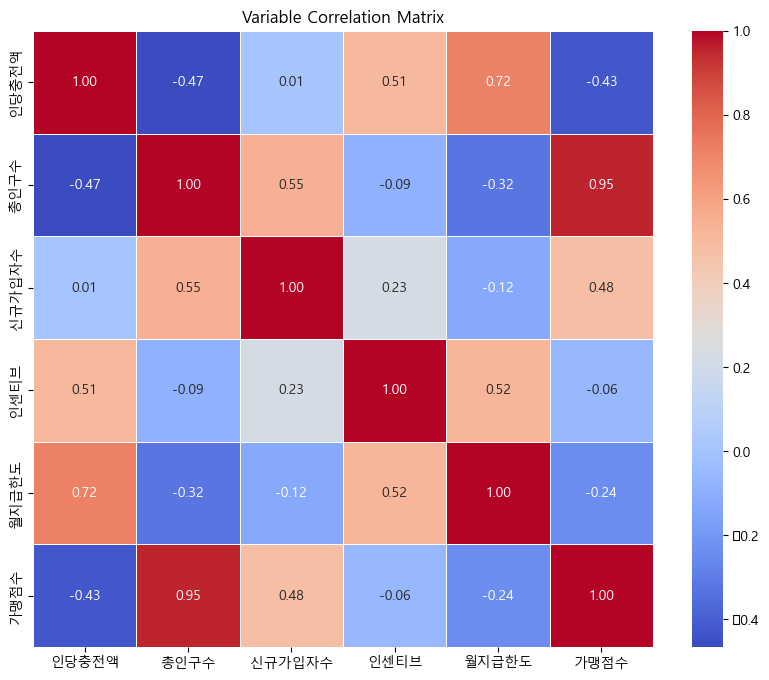

In [23]:
# 상관관계 매트릭스 생성
correlation_matrix = df[['인당충전액','총인구수', '신규가입자수', '인센티브', '월지급한도', '가맹점수']].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Variable Correlation Matrix')
plt.show()

In [25]:
# 독립변수와 종속변수 설정
X = df[['총인구수', '신규가입자수', '인센티브', '월지급한도', '가맹점수']]
y = df['인당충전액']

# 데이터를 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(58483953.10804438, 0.748374900099578)

In [7]:
df

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,인센티브,월지급한도,가맹점수,인당충전액
0,2023-12,가평군,62302,484.0,4051,2140,0.1,60000,3354,65021.989663
1,2023-11,가평군,62131,458.0,2368,2187,0.1,60000,3354,38113.019266
2,2023-10,가평군,62125,555.0,2596,2335,0.1,60000,3354,41786.720322
3,2023-09,가평군,61976,782.0,3113,2376,0.1,60000,3354,50229.120950
4,2023-08,가평군,61773,473.0,3631,2392,0.1,600000,3354,58779.725770
...,...,...,...,...,...,...,...,...,...,...
333,2023-05,화성시,928550,6717.0,35058,37413,0.1,30000,27663,37755.640515
334,2023-04,화성시,925186,8440.0,35557,35525,0.1,30000,27663,38432.271997
335,2023-03,화성시,922231,9111.0,35906,36982,0.1,30000,27663,38933.846292
336,2023-02,화성시,918865,7829.0,30162,33325,0.1,30000,27663,32825.279013


In [27]:
df['인센티브'].unique()

array([0.07, 0.06, 0.1 , 0.  ])

In [6]:
df.loc[df['인센티브'] == 0. ]

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,인센티브,월지급한도,가맹점수,인당충전액
34,2023-12,광명시,280197,1474.0,2100,5453,0.0,0,7835,7494.726924


In [8]:
df.loc[df['인센티브'] != 0.]

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,인센티브,월지급한도,가맹점수,인당충전액
0,2023-12,가평군,62302,484.0,4051,2140,0.1,60000,3354,65021.989663
1,2023-11,가평군,62131,458.0,2368,2187,0.1,60000,3354,38113.019266
2,2023-10,가평군,62125,555.0,2596,2335,0.1,60000,3354,41786.720322
3,2023-09,가평군,61976,782.0,3113,2376,0.1,60000,3354,50229.120950
4,2023-08,가평군,61773,473.0,3631,2392,0.1,600000,3354,58779.725770
...,...,...,...,...,...,...,...,...,...,...
333,2023-05,화성시,928550,6717.0,35058,37413,0.1,30000,27663,37755.640515
334,2023-04,화성시,925186,8440.0,35557,35525,0.1,30000,27663,38432.271997
335,2023-03,화성시,922231,9111.0,35906,36982,0.1,30000,27663,38933.846292
336,2023-02,화성시,918865,7829.0,30162,33325,0.1,30000,27663,32825.279013


In [9]:
df.to_csv('../data/경기도/전처리 후/회귀df최종.csv',index=False)